
<h2>Contrôleurs flous</h2>


Réalisé par :
* SOUIDI Mohamed Amine 181831044438
* DJEKOUNE Imad Eddine 181831089663


**Instalation de bibiotheque**

In [ ]:
!pip install fuzzylogic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for fuzzylogic: filename=fuzzylogic-1.2.0-py3-none-any.whl size=18442 sha256=dfcfed5eb2f1bfe6b75e1f5471e8c8f94ac1a786f2e9d047ce1ce2046260c17d
  Stored in directory: /root/.cache/pip/wheels/6f/e9/c9/e3b308779b569e831aa102932f114a867a58edd9b9e79c8316
Successfully built fuzzylogic


## 0) Importation des librairies nécessaire

In [ ]:
from fuzzylogic.classes import Domain, Set, Rule
from fuzzylogic.functions import trapezoid, triangular
import matplotlib.pyplot as plt
import numpy as np

## 1) Initialisation des domaines E/S du controlleur
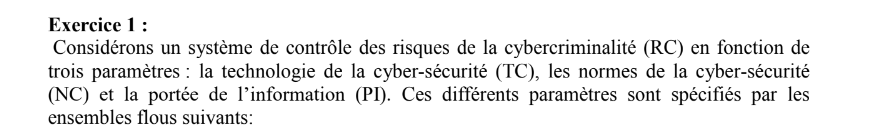

In [ ]:
def Initialisation(nameS ,low, high ,nameE1 ,low1, high1, nameE2 ,low2, high2,nameE3 ,low3, high3 ):
  return [Domain(nameS, low, high),Domain(nameE1, low1, high1),Domain(nameE2, low2, high2),Domain(nameE3, low3, high3)]

In [ ]:
RC ,TC,NC ,PI = Initialisation('Risques de la cybercriminalite ', -80, 70 ,'Technologie de la cyber securite', 20, 80,'Normes de la cyber securite', 9, 70,'Portee de l information', 5, 50)

In [ ]:
RC ,TC,NC ,PI 

(Domain('Risques de la cybercriminalite ', -80, 70, res=1, sets={}),
 Domain('Technologie de la cyber securite', 20, 80, res=1, sets={}),
 Domain('Normes de la cyber securite', 9, 70, res=1, sets={}),
 Domain('Portee de l information', 5, 50, res=1, sets={}))

## 2) Fuzification 
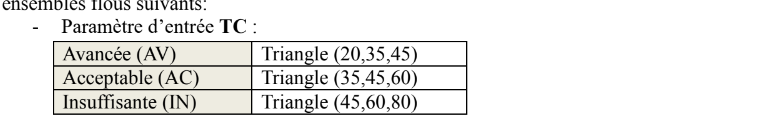

**Fonctions d’appartenance des entrées TC, NC et PI :**

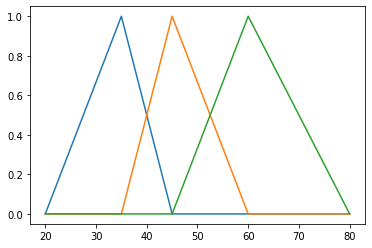

In [ ]:
# Initisation des paramètres d'entrée de TC
TC.AV = trapezoid(20, 35, 35, 45) # low < c_low <= c_high < high
TC.AC = trapezoid(35, 45, 45, 60)
TC.IN = trapezoid(45, 60, 60, 80)
TC.AV.plot()
TC.AC.plot()
TC.IN.plot()

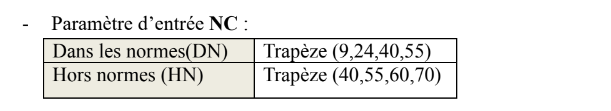

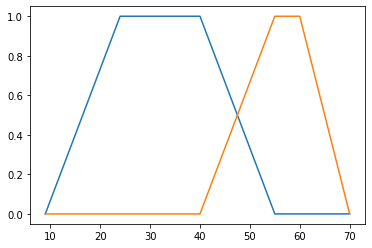

In [ ]:
# Initisation des paramètres d'entrée de NC
NC.DN = trapezoid(9, 24, 40, 55)
NC.HN = trapezoid(40, 55, 60, 70)
NC.DN.plot()
NC.HN.plot()

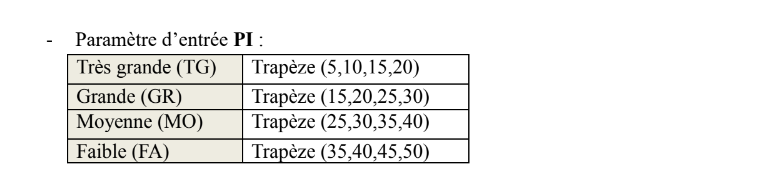

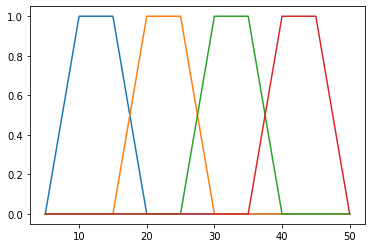

In [ ]:
# Initisation des paramètres d'entrée de PI
PI.TG = trapezoid(5, 10, 15, 20)
PI.GR = trapezoid(15, 20, 25, 30)
PI.MO = trapezoid(25, 30, 35, 40)
PI.FA = trapezoid(35, 40, 45, 50)
PI.TG.plot()
PI.GR.plot()
PI.MO.plot()
PI.FA.plot()

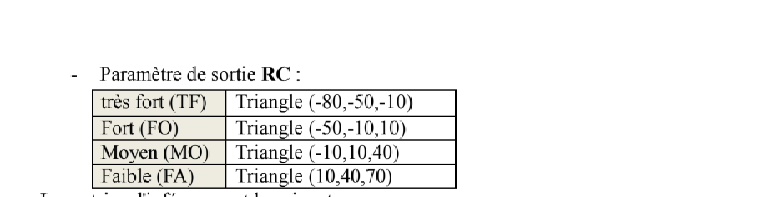

**Fonction d’appartenance de la sortie RC (sous forme de 4 sous-ensembles flous)**

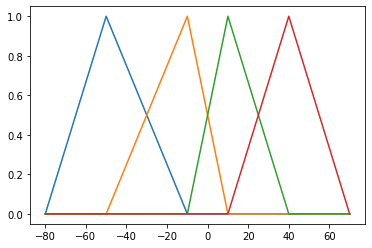

In [ ]:
# Initisation des paramètres de sortie de RC 
RC.TF = trapezoid(-80, -50, -50, -10)
RC.FO = trapezoid(-50, -10, -10, 10)
RC.MO = trapezoid(-10, 10, 10, 40)
RC.FA = trapezoid(10, 40, 40, 70)
RC.TF.plot()
RC.FO.plot()
RC.MO.plot()
RC.FA.plot()

# **Les regles**

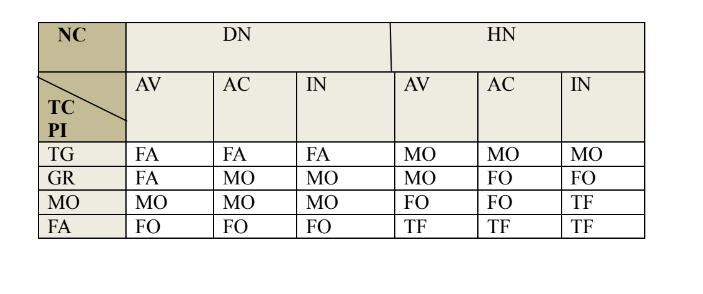

In [ ]:
# initialisation des regles de notre systeme
rules = Rule({
    (TC.AV, NC.DN, PI.TG): RC.FA,#  Avancée ,Dans les normes ,Très grande  
    (TC.AV, NC.DN, PI.GR): RC.FA,#  Avancée ,Dans les normes , grande
    (TC.AV, NC.DN, PI.MO): RC.MO,#  Avancée ,Dans les normes ,Moyenne
    (TC.AV, NC.DN, PI.FA): RC.FO,#  Avancée ,Dans les normes ,Faible
    (TC.AV, NC.HN, PI.TG): RC.MO,#  Avancée ,Hors normes ,Très grande
    (TC.AV, NC.HN, PI.GR): RC.MO,#  Avancée ,Hors normes , grande
    (TC.AV, NC.HN, PI.MO): RC.FO,#  Avancée ,Hors normes ,Moyenne
    (TC.AV, NC.HN, PI.FA): RC.TF,#  Avancée ,Hors normes ,Faible
    (TC.AC, NC.DN, PI.TG): RC.FA,#  Acceptable,Dans les normes ,Très grande
    (TC.AC, NC.DN, PI.GR): RC.MO,#  Acceptable,Dans les normes , grande
    (TC.AC, NC.DN, PI.MO): RC.MO,#  Acceptable,Dans les normes ,Moyenne
    (TC.AC, NC.DN, PI.FA): RC.FO,#  Acceptable,Dans les normes ,Faible
    (TC.AC, NC.HN, PI.TG): RC.MO,#  Acceptable,Hors normes ,Très grande
    (TC.AC, NC.HN, PI.GR): RC.FO,#  Acceptable,Hors normes ,grande
    (TC.AC, NC.HN, PI.MO): RC.FO,#  Acceptable,Hors normes ,Moyenne
    (TC.AC, NC.HN, PI.FA): RC.TF,#  Acceptable,Hors normes ,Faible
    (TC.IN, NC.DN, PI.TG): RC.FA,# Insuffisante,Dans les normes ,Très grande
    (TC.IN, NC.DN, PI.GR): RC.MO,# Insuffisante,Dans les normes , grande
    (TC.IN, NC.DN, PI.MO): RC.MO,# Insuffisante,Dans les normes ,Moyenne
    (TC.IN, NC.DN, PI.FA): RC.FO,# Insuffisante,Dans les normes ,Faible
    (TC.IN, NC.HN, PI.TG): RC.MO,# Insuffisante,Hors normes ,Très grande
    (TC.IN, NC.HN, PI.GR): RC.FO,# Insuffisante,Hors normes ,grande
    (TC.IN, NC.HN, PI.MO): RC.TF,# Insuffisante,Hors normes ,Moyenne
    (TC.IN, NC.HN, PI.FA): RC.TF # Insuffisante,Hors normes ,Faible
})

In [ ]:
"""rules2 = Rule({
    (TC.IN, NC.DN, PI.GR): RC.MO,
    (TC.IN, NC.DN, PI.TG): RC.FA,
    (TC.IN, NC.HN, PI.TG): RC.MO,
    (TC.IN, NC.HN, PI.GR): RC.FO,
    (TC.AC, NC.DN, PI.TG): RC.FA,
    (TC.AC, NC.DN, PI.GR): RC.MO,
    (TC.AC, NC.HN, PI.TG): RC.MO,
    (TC.AC, NC.HN, PI.GR): RC.FO,

})""""
    

## 4) Application de la méthode d'inférence (Mandani)

 Simuler le fonctionnement du contrôleur avec les paramètres suivants :
              TC=52 ; NC=42 ; PI=17
 On récupère les pourcentages d'appartenances de nos controleurs d'entrée selon leur valeur


In [ ]:

tc_output = list(TC(52).values())


nc_output = list(NC(42).values())


pi_output = list(PI(17).values())

In [ ]:
tc_output,nc_output,pi_output

([0, 0.5333333333333333, 0.4666666666666667],
 [0.8666666666666667, 0.13333333333333333],
 [0.6, 0.4, 0, 0])

In [ ]:
"""tc_output =[0.42, 0.58, 0]
nc_output =  [0.04, 0.96]
pi_output =  [0.68, 0.32, 0, 0] """

### **Utilisation de la Méthode MAX-MIN**

In [ ]:

# On applique les régles d'inférence de mandanie
rc_tf = max(
                min(tc_output[2], nc_output[1], pi_output[2]), #IN HM MO 
                min(tc_output[0], nc_output[1], pi_output[3]), #AC HN FA 
                min(tc_output[2], nc_output[1], pi_output[3]), 
                min(tc_output[1], nc_output[1], pi_output[3])
                )

rc_fo = max(
                min(tc_output[0], nc_output[0], pi_output[2]), 
                min(tc_output[1], nc_output[0], pi_output[2]), 
                min(tc_output[2], nc_output[0], pi_output[2]), 
                min(tc_output[1], nc_output[1], pi_output[1]), 
                min(tc_output[2], nc_output[1], pi_output[1]),
                min(tc_output[1], nc_output[1], pi_output[2]), 
                min(tc_output[0], nc_output[1], pi_output[2])
                )

rc_mo = max(
                min(tc_output[0], nc_output[1], pi_output[0]), 
                min(tc_output[1], nc_output[1], pi_output[0]), 
                min(tc_output[2], nc_output[1], pi_output[0]), 
                min(tc_output[0], nc_output[1], pi_output[1]), 
                min(tc_output[1], nc_output[0], pi_output[1]), 
                min(tc_output[2], nc_output[0], pi_output[1]), 
                min(tc_output[0], nc_output[0], pi_output[2]), 
                min(tc_output[1], nc_output[0], pi_output[2]),
                min(tc_output[2], nc_output[0], pi_output[2])
                )

rc_fa = max(
                min(tc_output[0], nc_output[0], pi_output[0]), 
                min(tc_output[1], nc_output[0], pi_output[0]), 
                min(tc_output[2], nc_output[0], pi_output[0]),  
                min(tc_output[0], nc_output[0], pi_output[1])
                )


all_values = [rc_tf, rc_fo,  rc_mo, rc_fa]

print(f"RC TF  = {rc_tf}\nRC FO = {rc_fo}\nRC MO  = {rc_mo}\nRC FA  =  {rc_fa}")

RC TF  = 0
RC FO = 0.13333333333333333
RC MO  = 0.4
RC FA  =  0.5333333333333333


## 5) Défuzzification (Calcule du centre de gravité)

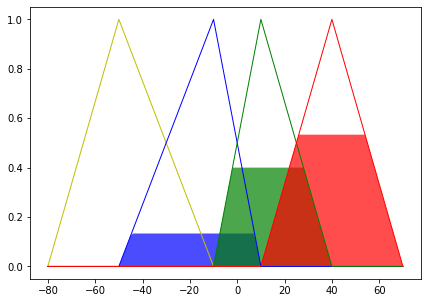

In [ ]:
fig, axis = plt.subplots(figsize=(7, 5))

x_RC = RC.range

RC_0 = np.zeros_like(x_RC)
parametres_RC = [RC.TF, RC.FO, RC.MO, RC.FA]
j=0
colors = ['y', 'b', 'g', 'r']
for each in parametres_RC:
    axis.plot(x_RC, each.array(), colors[j], linewidth=1)
    axis.fill_between(x_RC, RC_0, [min(all_values[j], x) for x in each.array()], facecolor=colors[j], alpha=0.7)
    j+=1

In [ ]:
values = {TC: 52, NC: 42, PI: 17}
centre_de_gravite = rules(values,method="cog")
print(f"Centre de gravite obtenu avec les valeurs TC = 52, NC = 42  et PI = 17 est egale a : {centre_de_gravite}")

Centre de gravite obtenu avec les valeurs TC = 52, NC = 42  et PI = 17 est egale a : 20.662251655629163
